In [ ]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['KERAS_BACKEND'] = 'tensorflow'

import numpy as np
from matplotlib import pyplot as plt
from itertools import product
import timeit

import pandas as pd 
from sklearn.utils import extmath
from fenics import *

import sys
sys.path.append('../data/data_generation/')

from model import *

#######################     CONFIGURATIONS     ##########################
np.random.seed(123)
train = True
save = True

In [2]:
# Resolution parameters
resolution_h1 = (50, 50)
resolution_h2 = (25, 25)
resolution_h3 = (10, 10)

# PDE parameters
field_mean = 1
field_stdev = 1
lamb_cov = 0.1
mkl = 64

# Set up the model(s)
solver_h1 = Model(resolution_h1, field_mean, field_stdev, mkl, lamb_cov)
solver_h2 = Model(resolution_h2, field_mean, field_stdev, mkl, lamb_cov)
solver_h3 = Model(resolution_h3, field_mean, field_stdev, 32, lamb_cov)


# Adjust the trasmissivity based on h1
list1 = solver_h1.solver.mesh.coordinates()
list2 = solver_h2.solver.mesh.coordinates()
list3 = solver_h3.solver.mesh.coordinates()

# Convert lists to numpy arrays if they are not already
array1 = np.array(list1)
array2 = np.array(list2)
array3 = np.array(list3)

# Convert to structured arrays for easy row-wise comparison
dtype = {'names': ['f{}'.format(i) for i in range(array1.shape[1])],
         'formats': [array1.dtype] * array1.shape[1]}

structured_array1 = array1.view(dtype)
structured_array2 = array2.view(dtype)
structured_array3 = array3.view(dtype)

# Create the boolean vector by checking if each row in array1 is in array2
bool_vector2 = np.in1d(structured_array1, structured_array2)
bool_vector3 = np.in1d(structured_array1, structured_array3)

# Set the trasmissivity field
solver_h2.random_process.eigenvalues = solver_h1.random_process.eigenvalues
solver_h2.random_process.eigenvectors = solver_h1.random_process.eigenvectors[bool_vector2]

solver_h3.random_process.eigenvalues = solver_h1.random_process.eigenvalues
solver_h3.random_process.eigenvectors = solver_h1.random_process.eigenvectors[bool_vector3]

Calling FFC just-in-time (JIT) compiler, this may take some time.


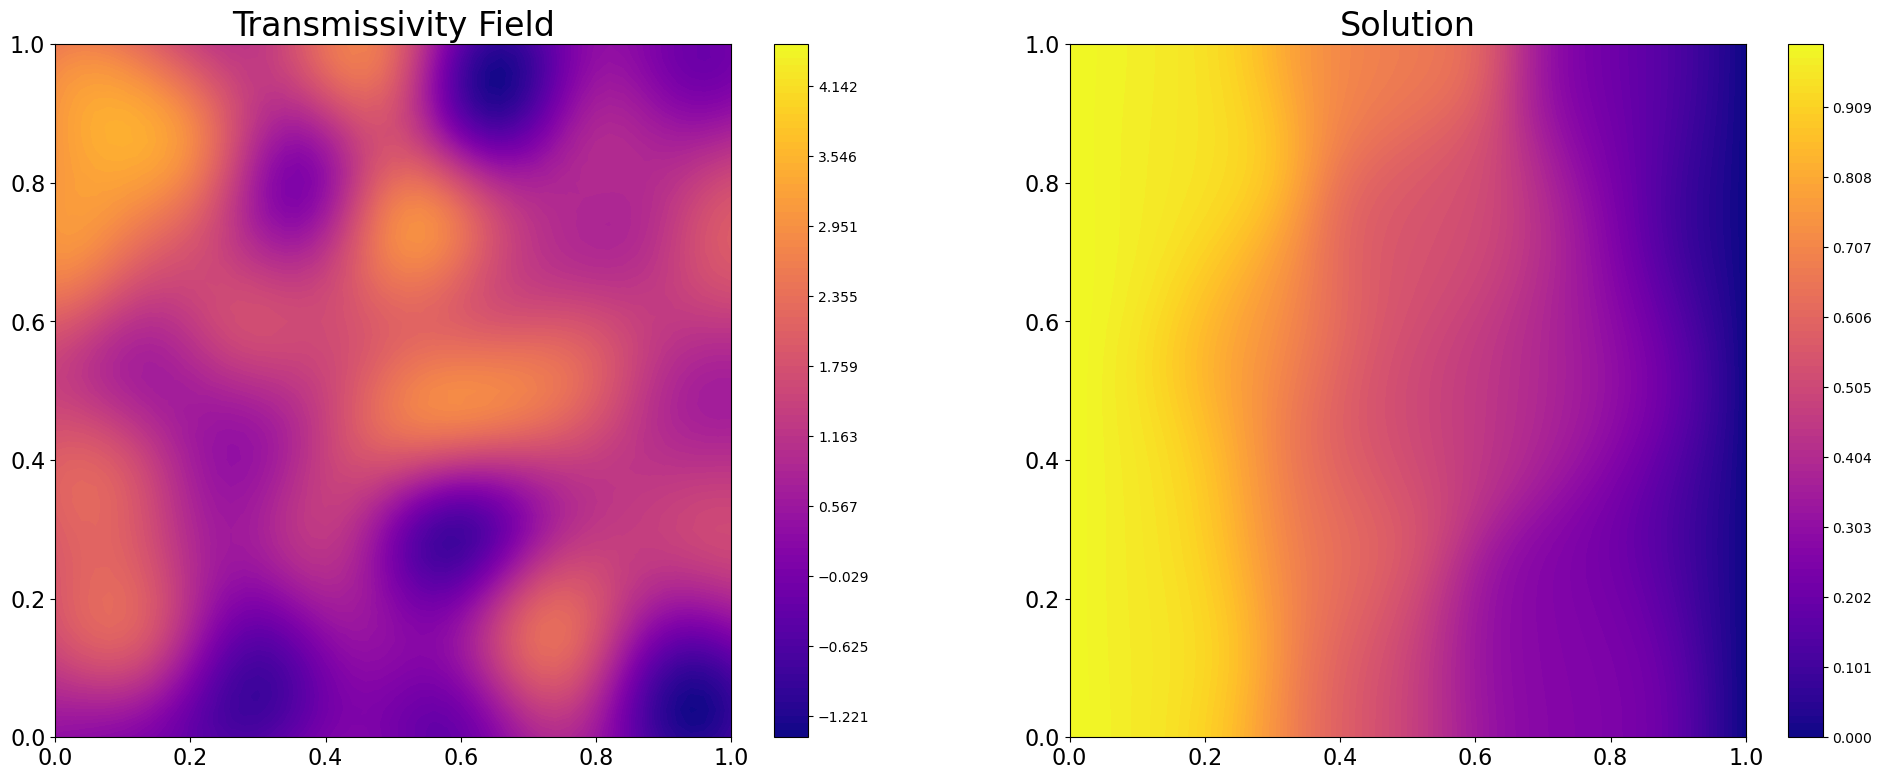

In [4]:
solver_h1.solve(np.ones(64))
solver_h1.plot(limits=[-1.4,4.5])

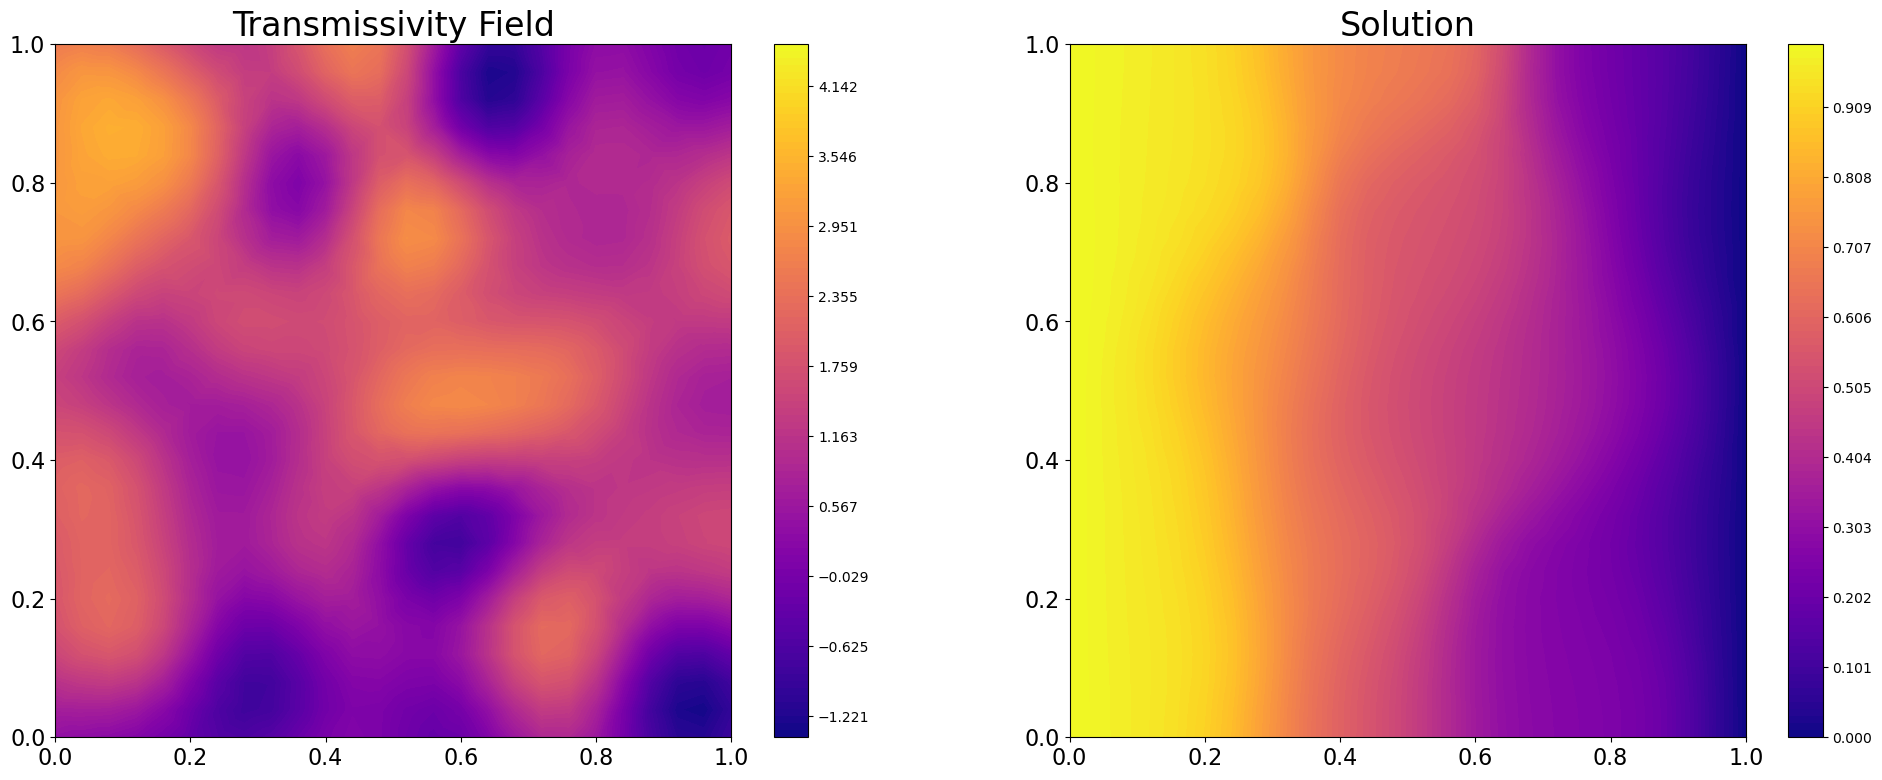

In [5]:
solver_h2.solve(np.ones(64))
solver_h2.plot(limits=[-1.4,4.5])

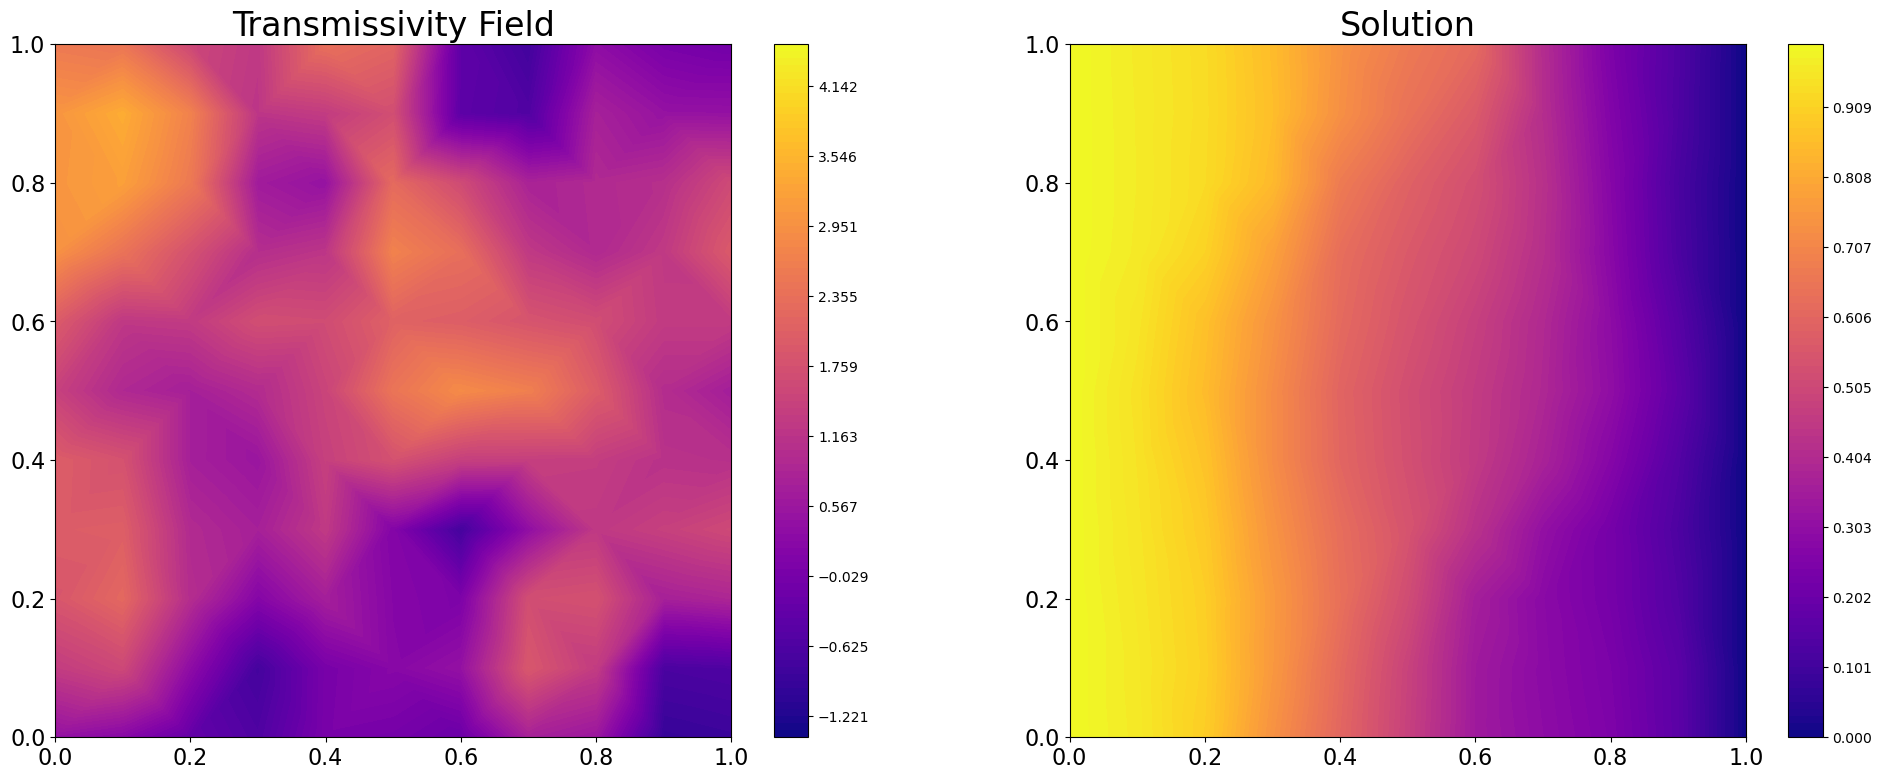

In [6]:
solver_h3.solve(np.ones(64))
solver_h3.plot(limits=[-1.4,4.5])